# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

Import the core data science libraries:

In [129]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [44]:
file_path = "data/computers.csv"
data = pd.read_csv(file_path)


## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

#### Show 5 rows, selected at random, from the data set: This code randomly selects 5 rows from the dataset and displays them.

In [45]:
data.sample(5)


,OID,Oversight Agency,Operator Name,Location Name,Address,AddrNum,AddrDir,AddrStr,Addr_Suffix,City,...,Borough,NTA Code,NTA Name,Council Distrcit,BoroCD,Census Tract,BCTCB2010,BIN,BBL,Location
94,67,New York Public Library,New York Public Library,"Science, Industry, and Business Library (SIBL)",188 Madison Avenue,188,NaN,Madison,Avenue,New York,...,Manhattan,MN17,Midtown-Midtown South,4,105,7400,10074001001,1087934,1008647502,POINT (-73.9830631 40.7481247)
237,213,Queens Library,Queens Library,Rochdale Village ALC,169-09 137 Avenue,169-09,NaN,137,Avenue,Jamaica,...,Queens,QN02,Springfield Gardens North,28,412,33402,40334024000,4270057,4124950175,POINT (-73.7706 40.67286)
338,327,Department for the Aging,JEWISH COMMUNITY CENTER OF STATEN ISLAND INC,JCC OF STATEN ISLAND INNOVATIVE SR CTR,1466 Manor Road,1466,NaN,Manor,Road,Staten Island,...,Staten Island,SI24,Todt Hill-Emerson Hill-Heartland Village-Light...,50,502,18100,50181001000,5141743,5009550100,POINT (-74.125677 40.594454)
142,150,Brooklyn Public Library,Brooklyn Public Library,Williamsburgh,240 Division Avenue,240,NaN,Division,Avenue,Brooklyn,...,Brooklyn,BK72,Williamsburg,33,301,52900,30529003008,3060090,3021890001,POINT (-73.95755461000002 40.70693042)
235,395,Department for the Aging,FORT GREENE COUNCIL,STUYVESANT HEIGHTS NEIGHBORHOOD SC,562-574 Madison Street,562-574,NaN,Madison,Street,Brooklyn,...,Brooklyn,BK35,Stuyvesant Heights,36,303,29300,30293004001,3045125,3016450001,POINT (-73.935295 40.686471)


#### Show each of the column names and their data types: This code shows the names of each column in the dataset along with their respective data types.


In [139]:
data.dtypes


OID                            int64
Oversight Agency              object
Operator Name                 object
Location Name                 object
Address                       object
City                          object
State                         object
Postcode                       int64
WiFi Dwn                     float64
WiFi Up                      float64
Wi-Fi Available                 bool
Workstation #                  int64
Staffed                         bool
Mon Open                      object
Mon Close                     object
Mon Open_2                    object
Mon Close_2                   object
Tue Open                      object
Tue Close                     object
Tue Open_2                    object
Tue Close_2                   object
Wed Open                      object
Wed Close                     object
Wed Open_2                    object
Wed Close_2                   object
Thu Open                      object
Thu Close                     object
T

#### Show any unique features of your chosen data set: This code shows the number of unique values in each column.

In [46]:
unique_values = data.nunique()
unique_values

OID                 508
Oversight Agency      7
Operator Name       135
Location Name       496
Address             493
                   ... 
Census Tract        371
BCTCB2010           479
BIN                 486
BBL                 480
Location            495
Length: 70, dtype: int64

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

#### This code deletes the fragmented address columns. In other words, the STREET address is just in one column now.

In [47]:
data.drop(["AddrNum", "AddrDir", "AddrStr", "Addr_Suffix"], axis=1, inplace=True)

data.sample(5)


,OID,Oversight Agency,Operator Name,Location Name,Address,City,State,Postcode,Latitude,Longitude,...,Borough,NTA Code,NTA Name,Council Distrcit,BoroCD,Census Tract,BCTCB2010,BIN,BBL,Location
105,231,Department of Parks and Recreation,Department of Parks and Recreation,East 54th,348 E 54th Street,New York,NY,10022,40.756466,-73.965137,...,Manhattan,MN19,Turtle Bay-East Midtown,4,106,9800,10098005000,1039840,1013460032,POINT (-73.965137 40.756466)
270,419,Department of Youth and Community Development,HANAC (Hellenic American Neighborhood Action C...,Astoria,4-05 Astoria Blvd,Queens,NY,11102,40.773352,-73.933745,...,Queens,QN71,Old Astoria,22,401,8700,40087003004,4430787,4004900101,POINT (-73.933745 40.773352)
442,484,Department of Youth and Community Development,El Puente de Williamsburg,Williams Plaza,323 Roebling Street,Brooklyn,NY,11211,40.708135,-73.960634,...,Brooklyn,BK73,North Side-South Side,33,301,52500,30525001011,3341975,3021400026,POINT (-73.960634 40.708135)
311,104,Brooklyn Public Library,Brooklyn Public Library,Central,10 Grand Army Plaza,Brooklyn,NY,11238,40.672406,-73.968215,...,Brooklyn,BK99,park-cemetery-etc-Brooklyn,35,355,17700,30177001000,3029665,3011830002,POINT (-73.968215 40.672406)
406,399,Department for the Aging,FORT GREENE COUNCIL,TERESA MOORE NEIGHBORHOOD SENIOR CENTER,2702 Linden Boulevard,Brooklyn,NY,11208,40.668837,-73.864605,...,Brooklyn,BK82,East New York,42,305,121400,31214001000,3326995,3044880001,POINT (-73.864605 40.668837)


#### This code removes the "Latitude" and "Longitude" columns as they are not needed for analysis.

In [51]:
data.drop(["Latitude", "Longitude"], axis=1, inplace=True)
data.sample(5)


,OID,Oversight Agency,Operator Name,Location Name,Address,City,State,Postcode,WiFi Dwn,WiFi Up,...,Borough,NTA Code,NTA Name,Council Distrcit,BoroCD,Census Tract,BCTCB2010,BIN,BBL,Location
101,121,Brooklyn Public Library,Brooklyn Public Library,Highlawn,1664 W. 13th Street,Brooklyn,NY,11223,101.0,35.0,...,Brooklyn,BK29,Bensonhurst East,44,311,40400,30404002000,3175253,3066180034,POINT (-73.986257 40.605703)
386,305,Department for the Aging,FIND AID FOR THE AGED,FIND AID ISC,141 West 73rd Street,Manhattan,NY,10023,7.0,1.0,...,Manhattan,MN14,Lincoln Square,6,107,15700,10157005000,1030011,1011450012,POINT (-73.979807 40.778922)
442,484,Department of Youth and Community Development,El Puente de Williamsburg,Williams Plaza,323 Roebling Street,Brooklyn,NY,11211,NaN,NaN,...,Brooklyn,BK73,North Side-South Side,33,301,52500,30525001011,3341975,3021400026,POINT (-73.960634 40.708135)
170,46,New York Public Library,New York Public Library,Mid- Manhattan,455 Fifth Avenue,New York,NY,10016,1000.0,1000.0,...,Manhattan,MN20,Murray Hill-Kips Bay,4,105,8200,10082001003,1017602,1008690074,POINT (-73.981604 40.751845)
387,5,New York Public Library,New York Public Library,96th Street,112 East 96th Street,New York,NY,10128,1000.0,1000.0,...,Manhattan,MN40,Upper East Side-Carnegie Hill,4,108,15801,10158014000,1048501,1015240064,POINT (-73.95180567000001 40.7859598)


#### This code drops columns related to the location that I do not think are necessary for my own understanding of the data.

In [52]:
location_cols = ["NTA Code", "Council Distrcit", "BoroCD", "Census Tract", "BCTCB2010", "BIN", "BBL", "Location"]
data[location_cols] = data[location_cols].apply(pd.to_numeric, errors="coerce")

data.drop(location_cols, axis=1, inplace=True)

data.sample(5)


,OID,Oversight Agency,Operator Name,Location Name,Address,City,State,Postcode,WiFi Dwn,WiFi Up,...,Training Hours Per Wk,Supplementary Equipment,Device Loaning,Devices Loaned,Access Requirements,Access Notes,URL,BoroCode,Borough,NTA Name
23,2,New York Public Library,New York Public Library,53rd Street,18 West 53rd Street,New York,NY,10019,1000.0,1000.0,...,0.2,"Printer, Photocopier, Projector",NaN,NaN,All ages; library card required for use of pub...,NaN,https://www.nypl.org/locations/53rd-street,1,Manhattan,Midtown-Midtown South
300,47,New York Public Library,New York Public Library,Morningside Heights,2900 Broadway,New York,NY,10025,1000.0,1000.0,...,3.2,"Printer, Photocopier, Projector",NaN,NaN,All ages; library card required for use of pub...,NaN,https://www.nypl.org/locations/morningside-hei...,1,Manhattan,Morningside Heights
193,37,New York Public Library,New York Public Library,Hunt's Point,877 Southern Boulevard,Bronx,NY,10459,60.0,60.0,...,10.7,"Printer, Photocopier, Projector",NaN,NaN,All ages; library card required for use of pub...,NaN,https://www.nypl.org/locations/hunts-point,2,Bronx,Hunts Point
228,269,Department for the Aging,CATHOLIC CHARITIES NEIGHBORHOOD SERVICES INC,BAYSIDE NEIGHBORHOOD SENIOR CENTER,221-15 Horace Harding Expressway,Queens,NY,11364,17.0,2.0,...,5.0,"Printer, Scanner, Projector",NaN,NaN,Must be 60+ years of age to access,NaN,https://www.ccbq.org/what-we-do/older-adult-se...,4,Queens,Oakland Gardens
138,282,Department for the Aging,CATHOLIC CHARITIES NEIGHBORHOOD SERVICES INC,CCNS CATHERINE SHERIDAN NSC,35-24 83rd Street,Queens,NY,11372,7.0,3.0,...,1.0,NaN,NaN,NaN,Must be 60+ years of age to access,NaN,https://www.ccbq.org/what-we-do/older-adult-se...,4,Queens,Jackson Heights


#### This code drops the Wireline Dwn/Wireline Up columns.

In [48]:
data.drop(["Wireline Dwn", "Wireline Up"], axis=1, inplace=True)
data.sample(5)


,OID,Oversight Agency,Operator Name,Location Name,Address,City,State,Postcode,Latitude,Longitude,...,Borough,NTA Code,NTA Name,Council Distrcit,BoroCD,Census Tract,BCTCB2010,BIN,BBL,Location
447,450,Department of Youth and Community Development,"MMCC (Mosholu Montefiore Community Center, Inc.)",Marble Hill,5365 Broadway,Bronx,NY,10463,40.876526,-73.908063,...,Manhattan,MN01,Marble Hill-Inwood,10,208,30900,10309001000,1082782,1022150623,POINT (-73.908063 40.876526)
357,380,Department for the Aging,SELFHELP COMMUNITY SERVICES INC,SELFHELP AUSTIN STREET NEIGHBORHOOD SC,106-06 Queens Boulevard,Queens,NY,11375,40.721700,-73.847500,...,Queens,QN17,Forest Hills,29,406,71100,40711004004,4077479,4032370040,POINT (-73.8475 40.7217)
397,226,Department of Parks and Recreation,Department of Parks and Recreation,Al Oerter,131-40 Fowler Avenue,Flushing,NY,11355,40.751405,-73.833841,...,Queens,QN99,park-cemetery-etc-Queens,20,407,38302,40383021090,4540092,4020180001,POINT (-73.833841 40.751405)
93,1,New York Public Library,New York Public Library,125th Street,224 East 125th Street,New York,NY,10035,40.803018,-73.934848,...,Manhattan,MN34,East Harlem North,8,111,24200,10242003009,1054674,1017890037,POINT (-73.93484756 40.80301816000001)
195,302,Department for the Aging,ELMCOR YOUTH & ADULT ACTIVITIES INC,Elmcor's Golden Phoenix Club Two,107-20 Northern Boulevard,Queens,NY,11368,40.757600,-73.861217,...,Queens,QN26,North Corona,21,403,38100,40381001005,4311969,4017220005,POINT (-73.861217 40.7576)


#### This code saves the munged data to a new CSV file.

In [ ]:
data.to_csv("data/munged_data.csv", index=False)
data.sample(5)

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

#### Reading the munged file from the data directory to start.

In [63]:
munged_file="data/munged_data.csv"
df = pd.read_csv(munged_file)


#### This code is grouping by Borough and counting the number of public computer centers in each Borough, while also sorting the results from high to low to show which borough has the most centers.

In [ ]:
centers_by_borough = df.groupby('Borough')['Location Name'].count().sort_values(ascending=False)
centers_by_borough


#### This code displays data on accesibility in Brooklyn Computer Centers, where 'Y' is yes, 'N' is no, and 'Partially' is, well, partially.

In [120]:
brooklyn_data = df[df['Borough'] == 'Brooklyn']

wheelchair_counts = brooklyn_data['Wheelchair Accessible'].value_counts()
wheelchair_counts


Wheelchair Accessible
Y            133
N              6
Partially      4
Name: count, dtype: int64

#### To find available gaming consoles, this code uses the str.contains() method to filter rows where the "Supplementary Equipment" column contains the substring "gaming". It then lists out the borough, address, and complete list of the location's Supplementary Equipment.

In [ ]:
gaming_equipment_data = df[df['Supplementary Equipment'].str.contains('gaming', case=False, na=False)]

for index, row in gaming_equipment_data.iterrows():
    address = row['Address']
    borough = row['Borough']
    equipment_list = row['Supplementary Equipment']
    
    print(f"Address: {address}, Borough: {borough}")
    print(f"Supplementary Equipment: {equipment_list}")
    print("-" * 50) 




#### This code displays the total number of workstations available across all centers.

In [67]:
total_workstations = df['Workstation #'].sum()

total_workstations

11501

#### This code shows the average Wi-Fi download speeds by borough.

In [106]:
avg_wifi_speeds_by_borough = df.groupby('Borough')['WiFi Dwn'].mean().sort_values(ascending=False)
avg_wifi_speeds_by_borough

Borough
Manhattan        367.087379
Bronx            172.876543
Staten Island     82.954545
Brooklyn          71.500000
Queens            58.700000
Name: WiFi Dwn, dtype: float64

#### This code shows the average training hours per week for each borough.

In [107]:
avg_training_hours = df.groupby('Borough')['Training  Hours Per Wk'].mean().sort_values(ascending=False)
avg_training_hours

Borough
Manhattan        5.949573
Staten Island    5.644000
Bronx            5.321053
Brooklyn         5.298601
Queens           3.719531
Name: Training  Hours Per Wk, dtype: float64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

#### Before I start the visualization code for number of centers by borough, I must define the operation below.

In [108]:
centers_by_borough = df['Borough'].value_counts()


#### Below is the visualization code for Number of Centers by Borough.

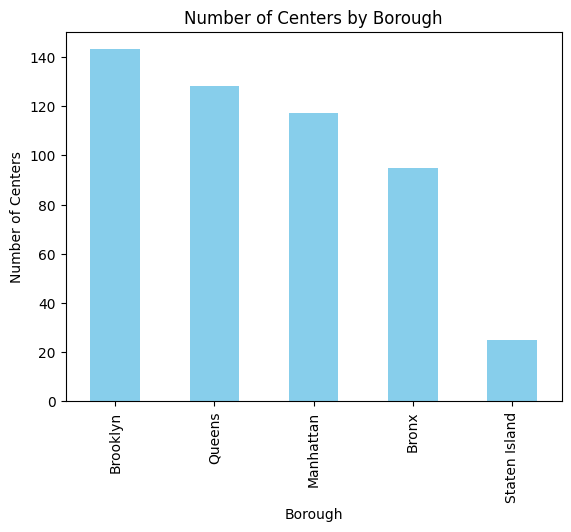

In [110]:
centers_by_borough.plot(kind='bar', color='skyblue')
plt.title('Number of Centers by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Centers')
plt.show()

#### Distribution of Wheelchair Accesible Centers in NYC: counting with value_counts().

In [118]:
wheelchair_counts = df['Wheelchair Accessible'].value_counts()


#### This is the code for the pie chart visualization of the distribution.

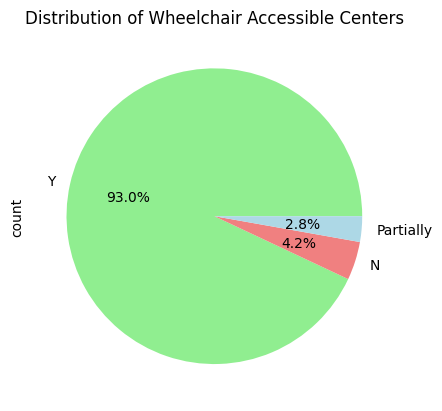

In [122]:
wheelchair_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightblue'])
plt.title('Distribution of Wheelchair Accessible Centers')
plt.show()


#### To find the top 5 largest oversight agencies, I am using .value_counts() and .nlargest(5).

In [126]:
top_agencies = df['Oversight Agency'].value_counts().nlargest(5)


#### This is a horizontal bar chart of the top 5 largest oversight agencies.

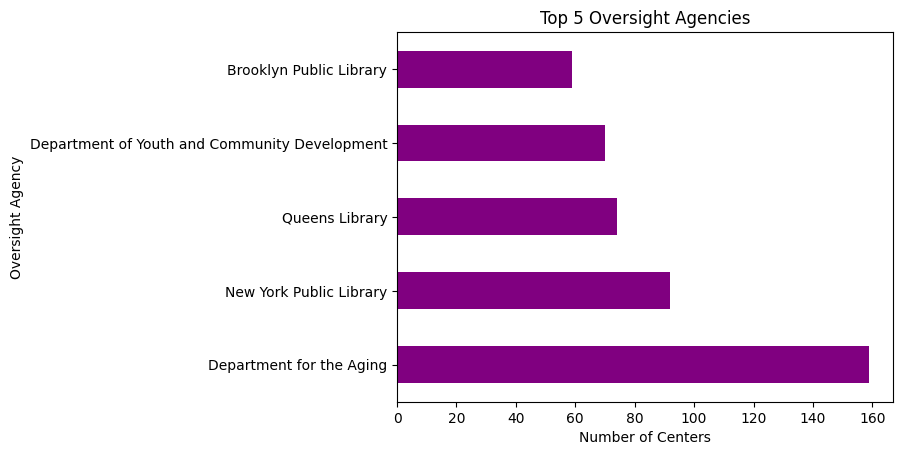

In [127]:
top_agencies.plot(kind='barh', color='purple')
plt.title('Top 5 Oversight Agencies')
plt.xlabel('Number of Centers')
plt.ylabel('Oversight Agency')
plt.show()

#### I am using matplotlib.pyplot as plt to create a density plot for the column of 'WiFi Dwn', showing the distribution and concentration of Wi-Fi download speeds.

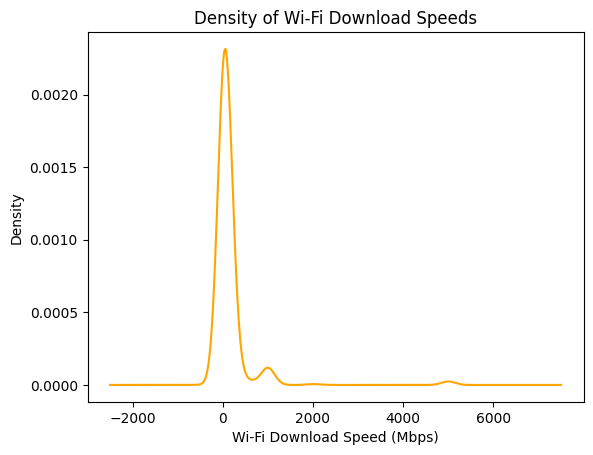

In [134]:
df['WiFi Dwn'].plot(kind='density', color='orange')
plt.title('Density of Wi-Fi Download Speeds')
plt.xlabel('Wi-Fi Download Speed (Mbps)')
plt.ylabel('Density')
plt.show()

#### WiFi Download/Upload Speeds Scatter Plot: first, I'll define the variables to extract information from the correct columns.

In [136]:
wifi_download = df['WiFi Dwn']
wifi_upload = df['WiFi Up']

#### This code creates a scatter plot with WiFi download speeds on the x-axis and WiFi upload speeds on the y-axis, with the points on the plot representing different locations. 

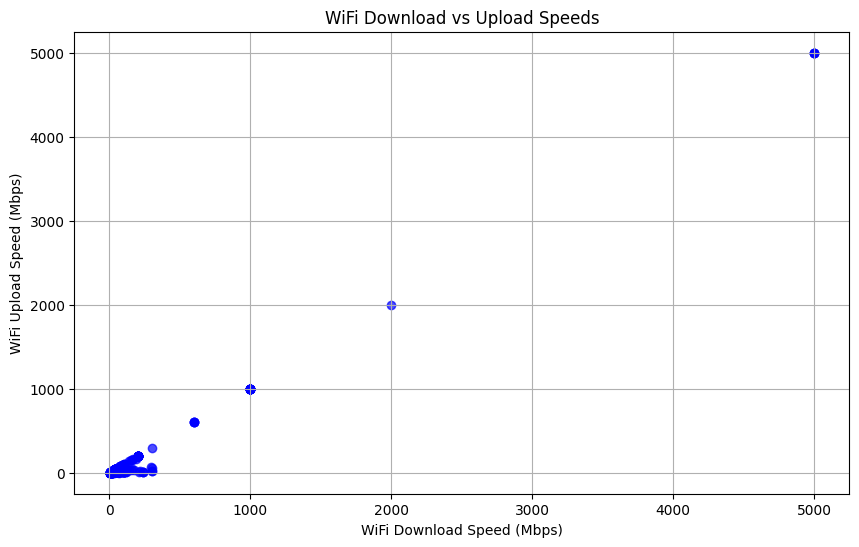

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(wifi_download, wifi_upload, color='blue', alpha=0.7)
plt.title('WiFi Download vs Upload Speeds')
plt.xlabel('WiFi Download Speed (Mbps)')
plt.ylabel('WiFi Upload Speed (Mbps)')
plt.grid(True)
plt.show()